In [2]:
import os

# Отримуємо поточну директорію
print("Поточна директорія:", os.getcwd())

# Змінюємо директорію на lesson_3_pandas
os.chdir("/Users/stacey_xd/Python/work/fraud-detector")

# Перевіряємо зміну
print("Нова директорія:", os.getcwd())

Поточна директорія: /Users/stacey_xd/Python/work/fraud-detector/notebooks
Нова директорія: /Users/stacey_xd/Python/work/fraud-detector


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# For SMOTE
from imblearn.over_sampling import SMOTE

# Optional: fix random seed
RANDOM_STATE = 42

In [34]:
# Load Cleaned Dataset
df = pd.read_csv("data/creditcard_preprocessed.csv")
print("Shape of original dataset:", df.shape)
df["Class"].value_counts(normalize=True)

Shape of original dataset: (283726, 31)


Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

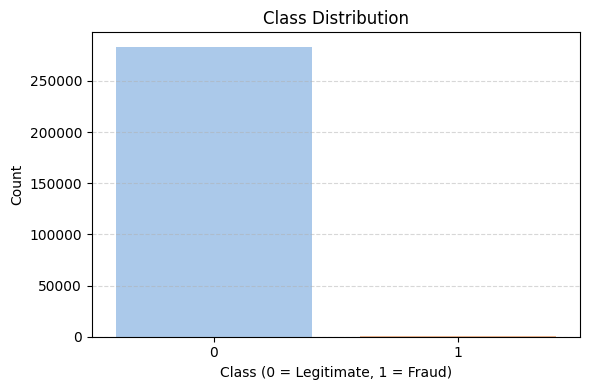

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/creditcard_preprocessed.csv")

# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", hue="Class", data=df, palette="pastel", legend=False)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [47]:
X = df.drop("Class", axis=1)
y = df["Class"]

smote = SMOTE(random_state=RANDOM_STATE)
X_smote, y_smote = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_smote))

After SMOTE: Counter({0: 283253, 1: 283253})


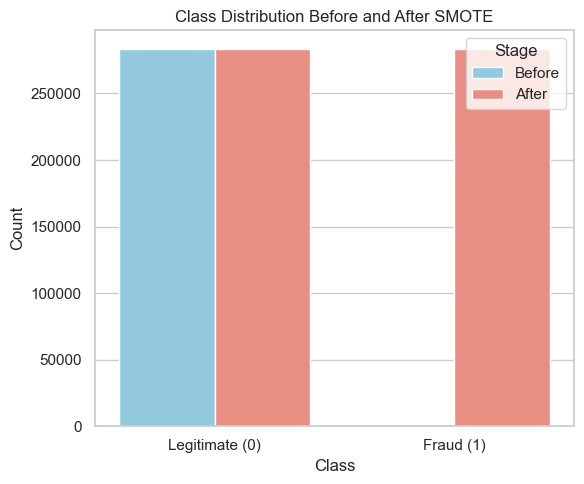

In [48]:
# Create DataFrame for visualization
df_original = pd.DataFrame({"Class": y, "Stage": "Before"})
df_resampled = pd.DataFrame({"Class": y_smote, "Stage": "After"})
df_combined = pd.concat([df_original, df_resampled])

# Plot
plt.figure(figsize=(6, 5))
sns.countplot(data=df_combined, x="Class", hue="Stage", palette=["skyblue", "salmon"])
plt.title("Class Distribution Before and After SMOTE")
plt.xticks([0, 1], ['Legitimate (0)', 'Fraud (1)'])
plt.ylabel("Count")
plt.xlabel("Class")
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

# Create DataFrame from SMOTE-resampled features
X_smote_df = pd.DataFrame(X_smote, columns=df.drop("Class", axis=1).columns)

# Create Series for target
y_smote_series = pd.Series(y_smote, name="Class")

# Combine into a single DataFrame
smote_df = pd.concat([X_smote_df, y_smote_series], axis=1)

# Save to CSV
smote_df.to_csv("data/creditcard_smote.csv", index=False)

# Output confirmation and shape
print("Saved to 'data/creditcard_smote.csv'")
print("New shape:", smote_df.shape)

Saved to 'data/creditcard_smote.csv'
New shape: (566506, 31)


In [40]:
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter

# Load preprocessed dataset
df = pd.read_csv("data/creditcard_preprocessed.csv")

# Split features and target
X = df.drop("Class", axis=1).values
y = df["Class"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=42, kind="borderline-1")
X_bsmote, y_bsmote = bsmote.fit_resample(X_train, y_train)

# Show class distribution
print("Before:", Counter(y_train))
print("After BorderlineSMOTE:", Counter(y_bsmote))

Before: Counter({0: 226602, 1: 378})
After BorderlineSMOTE: Counter({0: 226602, 1: 226602})


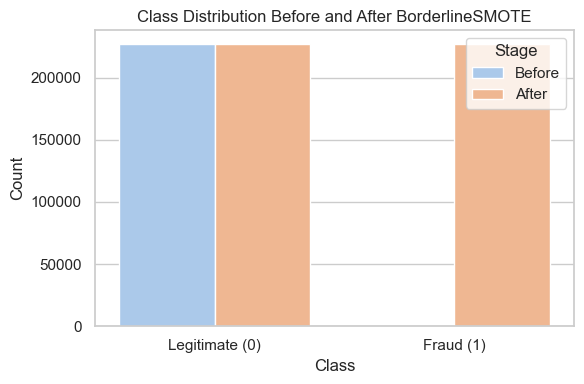

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Prepare data for visualization
before_counts = pd.Series(y_train).value_counts().sort_index()
after_counts = pd.Series(y_bsmote).value_counts().sort_index()

# Create DataFrame for plotting
df_plot = pd.DataFrame({
    'Class': [0, 1],
    'Before': before_counts.values,
    'After': after_counts.values
})

# Melt DataFrame to long format
df_plot_melted = df_plot.melt(id_vars='Class', var_name='Stage', value_name='Count')

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Count', hue='Stage', data=df_plot_melted, palette='pastel')
plt.title("Class Distribution Before and After BorderlineSMOTE")
plt.xticks([0, 1], ["Legitimate (0)", "Fraud (1)"])
plt.tight_layout()
plt.show()

In [6]:
# Convert to DataFrame
X_bsmote_df = pd.DataFrame(X_bsmote, columns=df.drop("Class", axis=1).columns)
y_bsmote_series = pd.Series(y_bsmote, name="Class")
bsmote_df = pd.concat([X_bsmote_df, y_bsmote_series], axis=1)

# Save to CSV
bsmote_df.to_csv("data/creditcard_borderlinesmote.csv", index=False)

print("Saved to 'data/creditcard_borderlinesmote.csv'")
print("New shape:", bsmote_df.shape)

Saved to 'data/creditcard_borderlinesmote.csv'
New shape: (453204, 31)


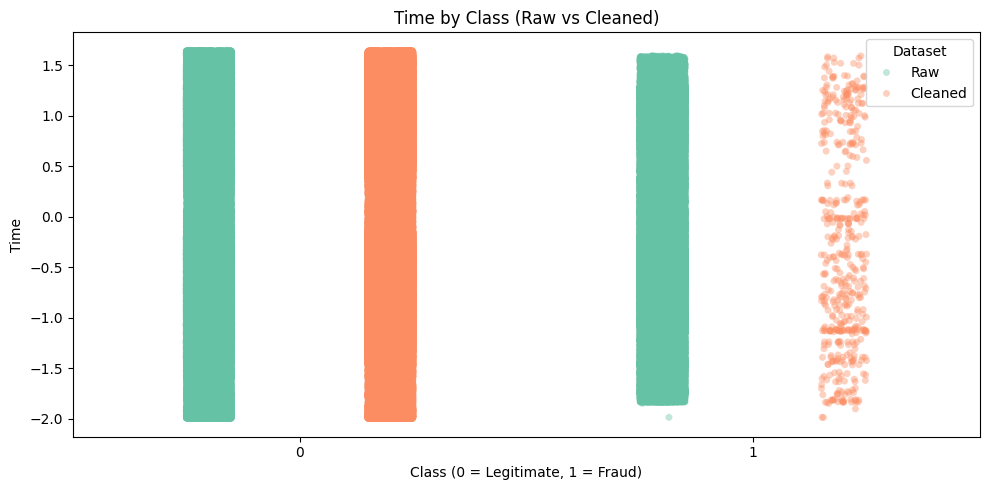

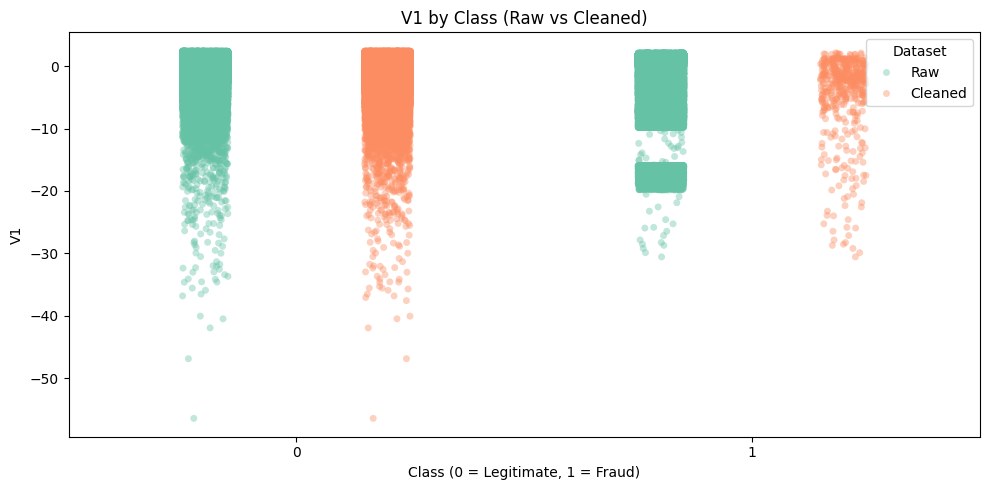

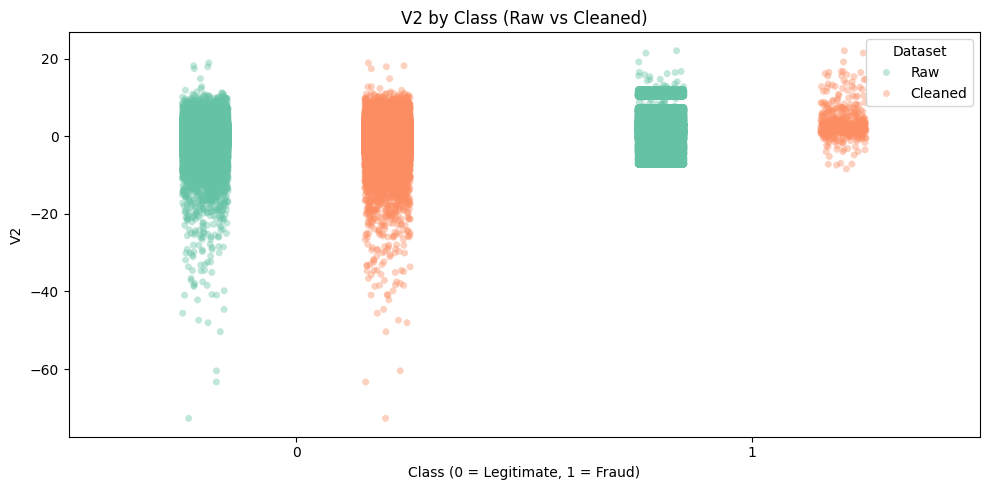

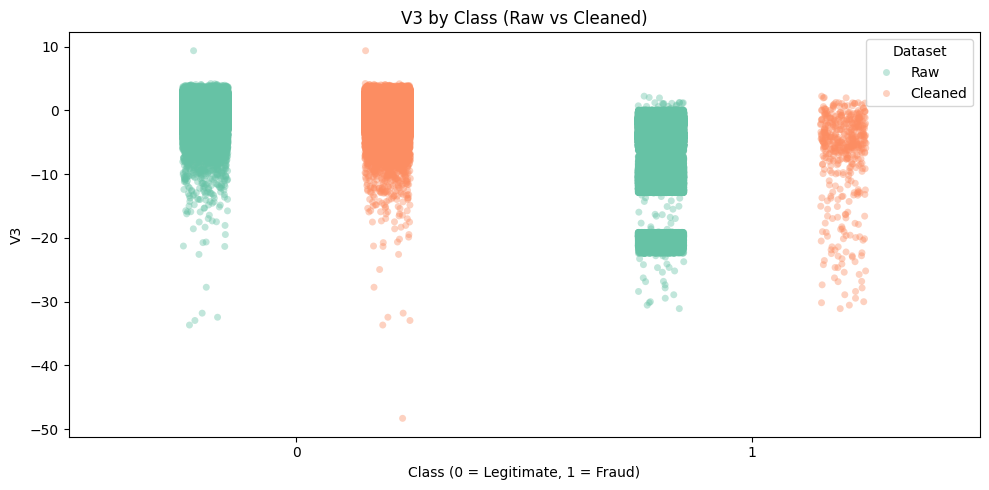

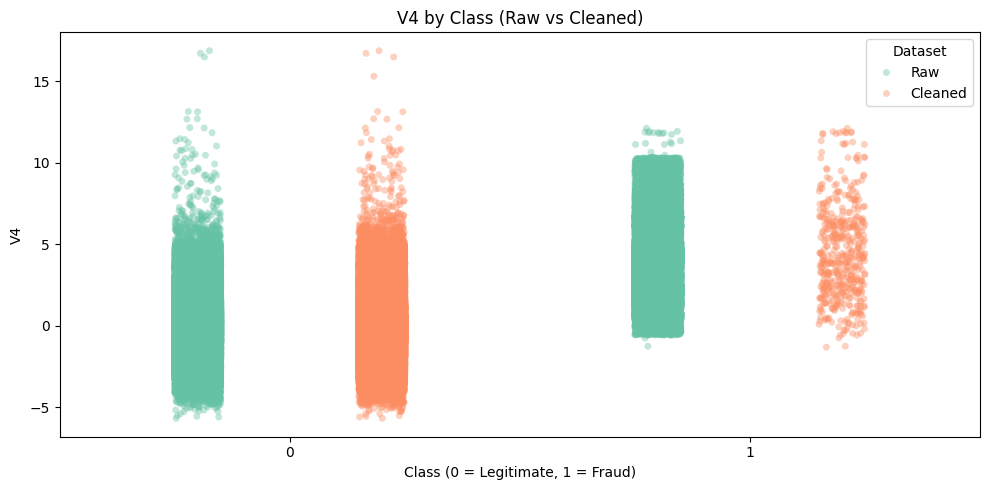

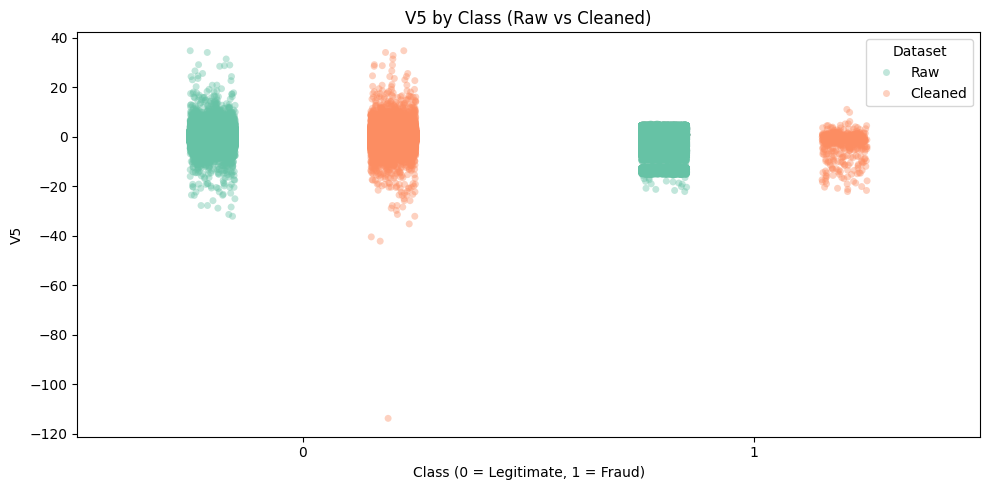

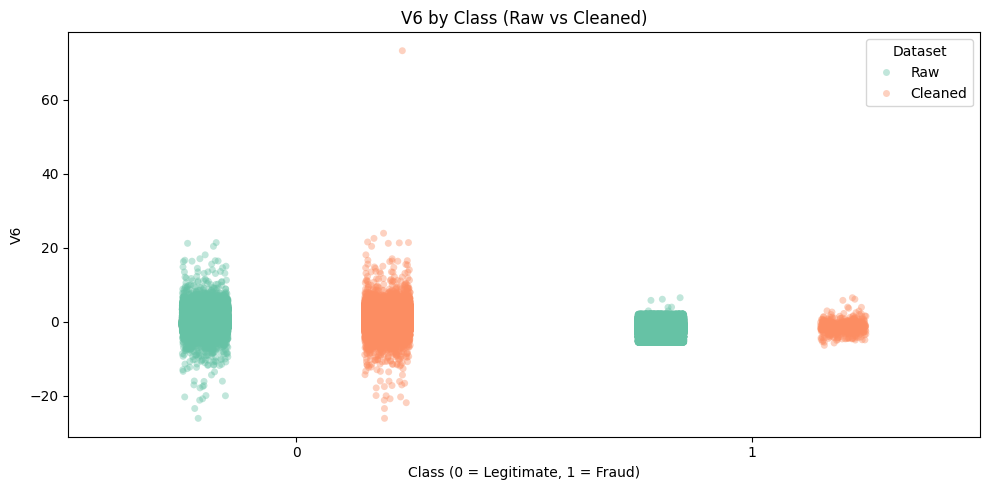

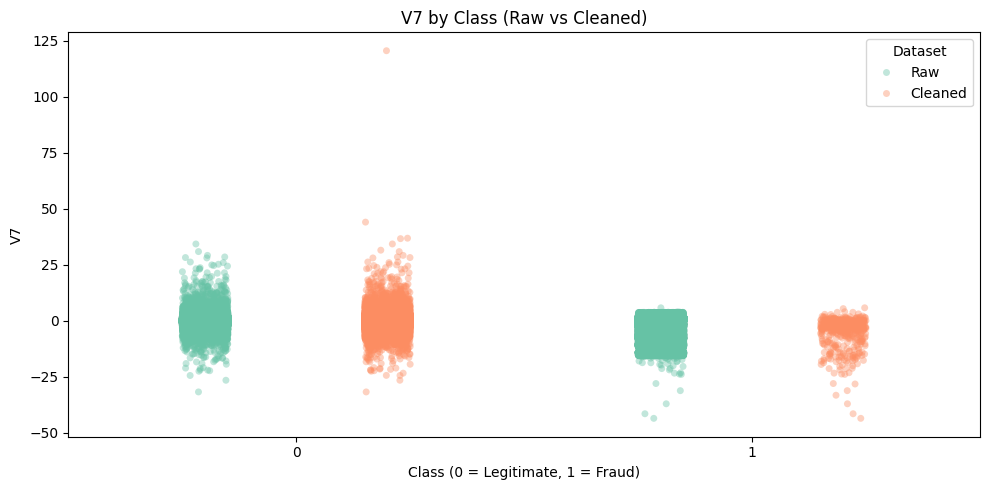

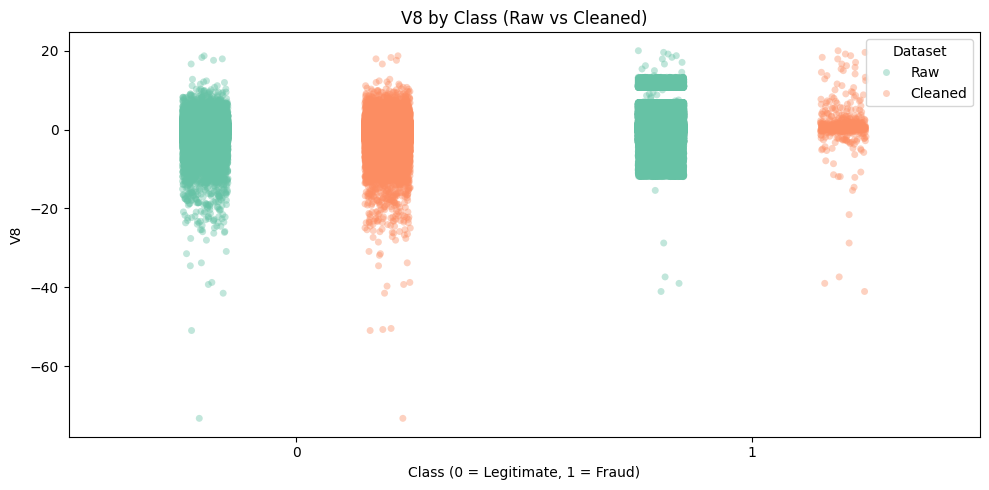

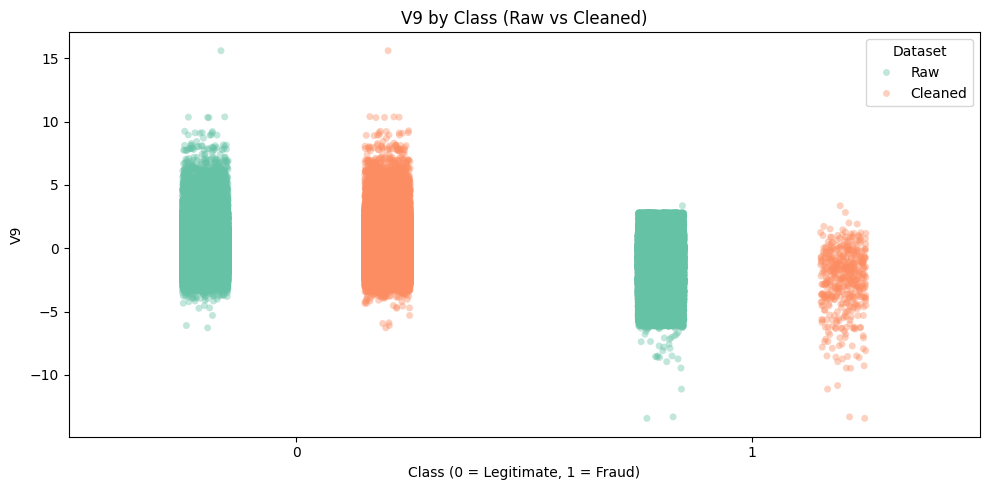

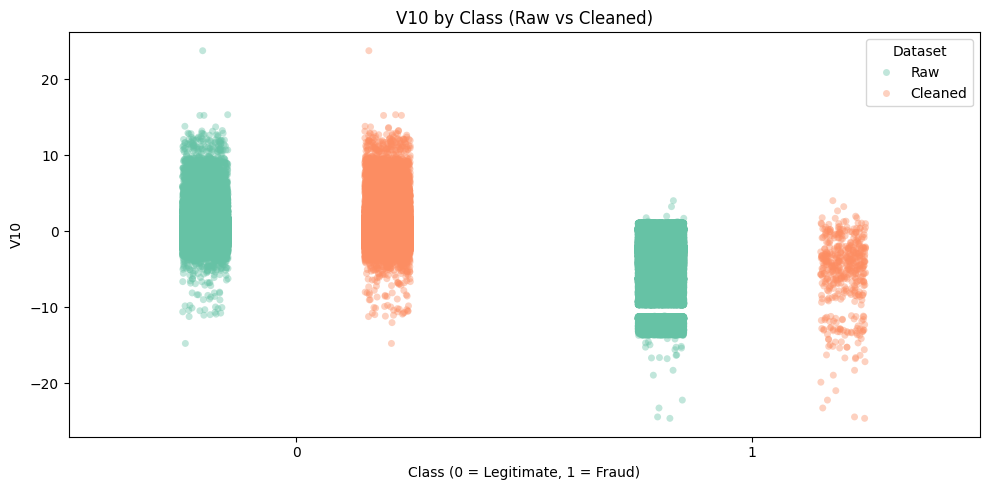

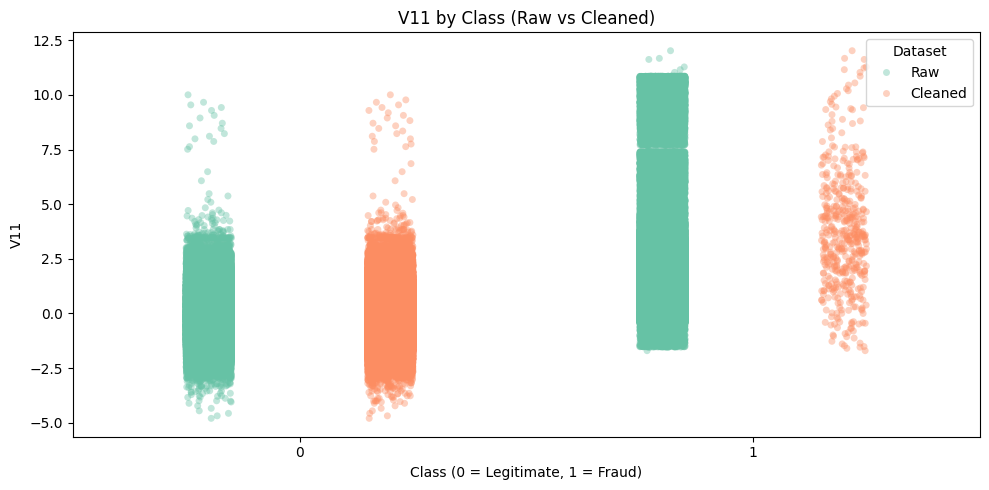

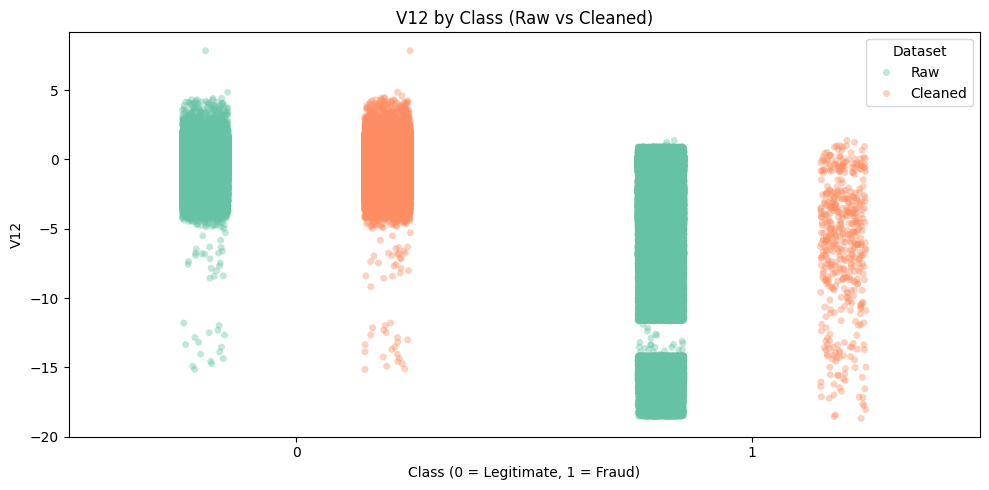

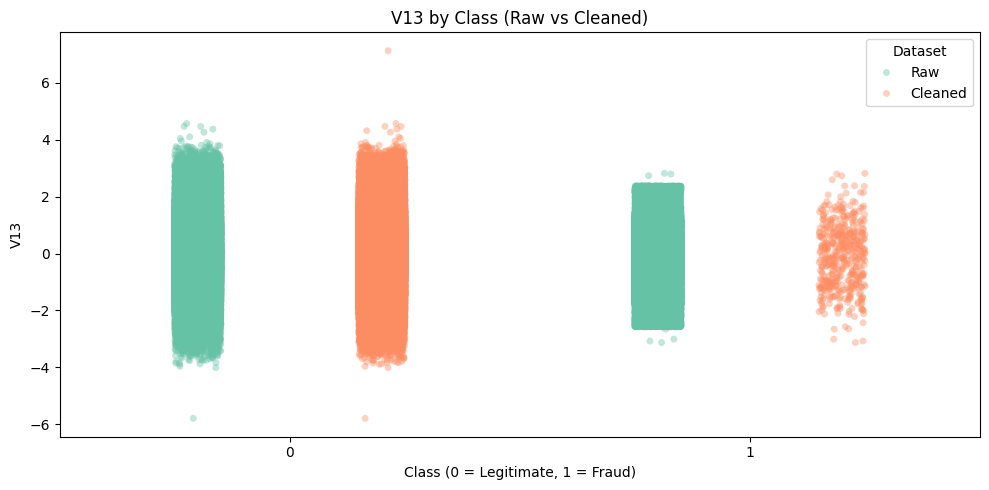

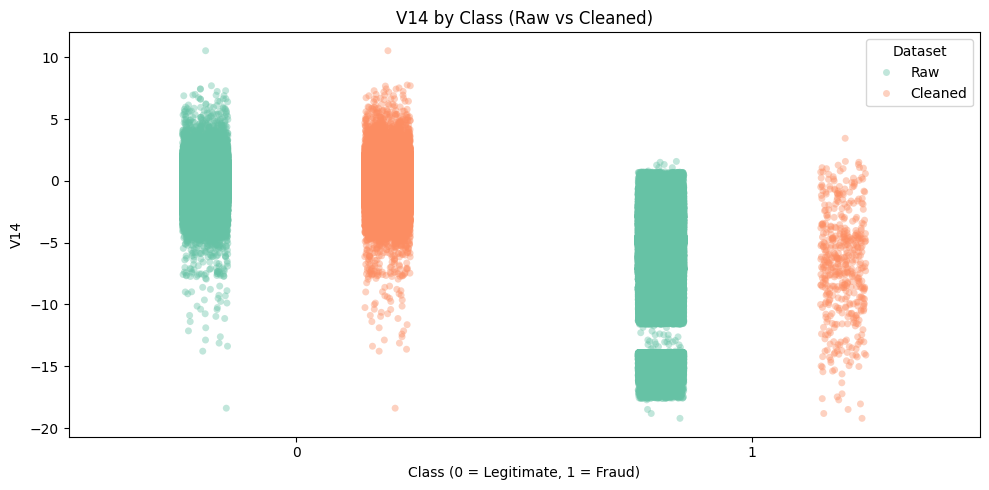

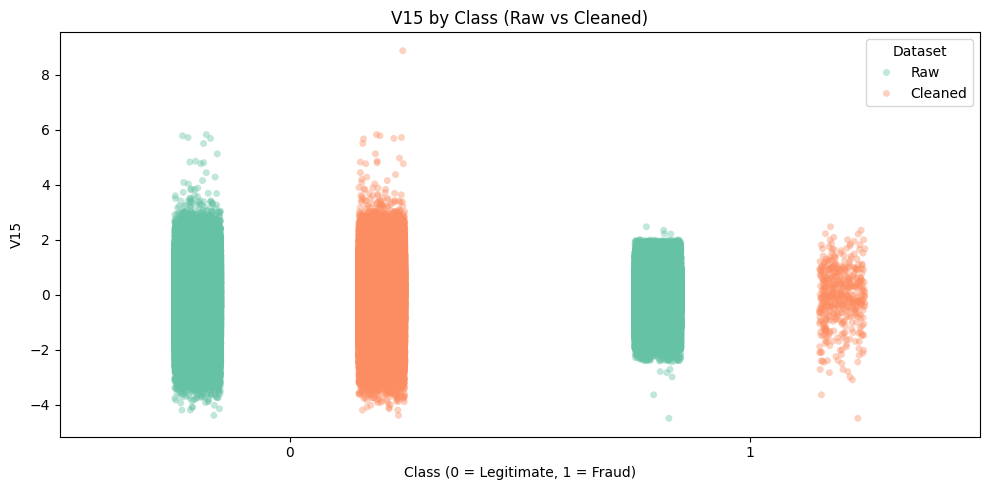

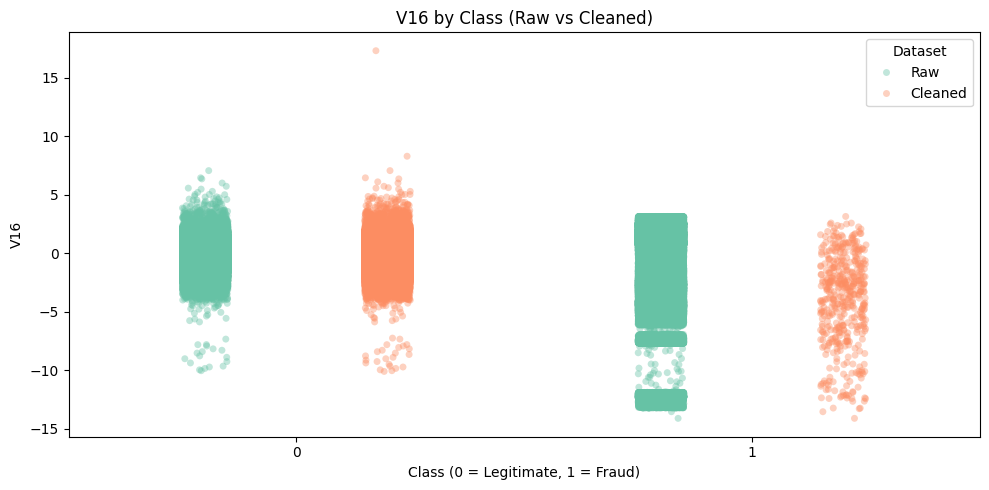

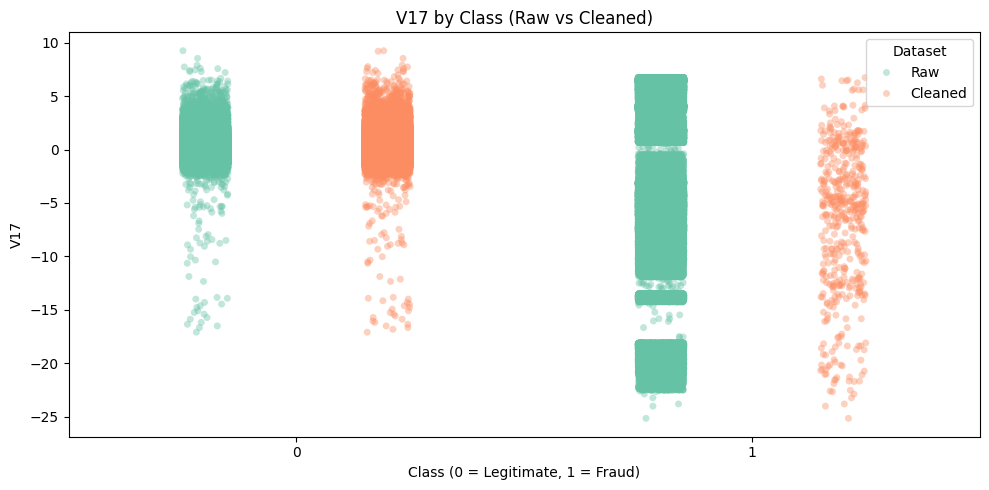

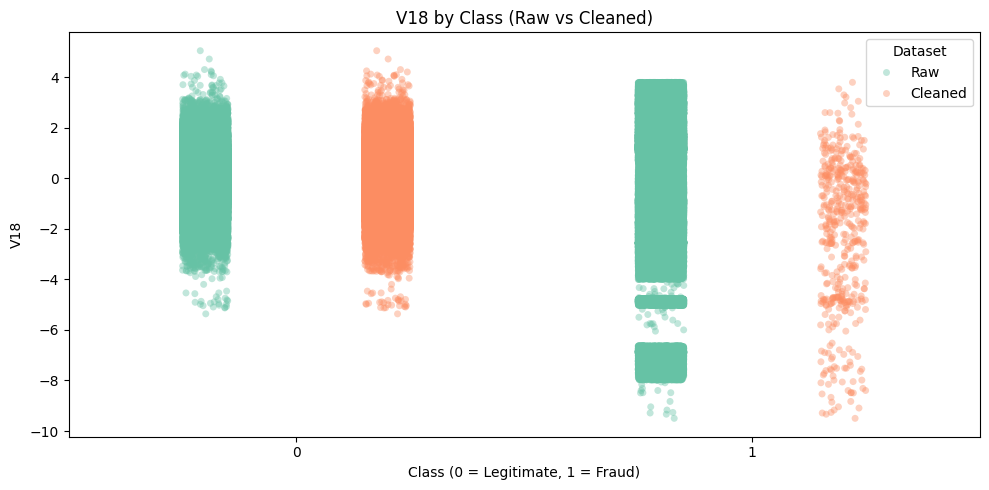

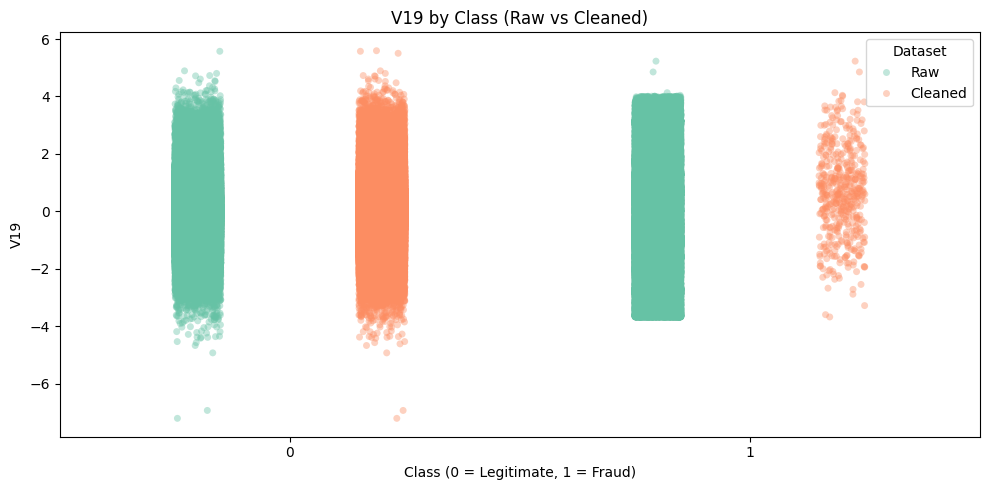

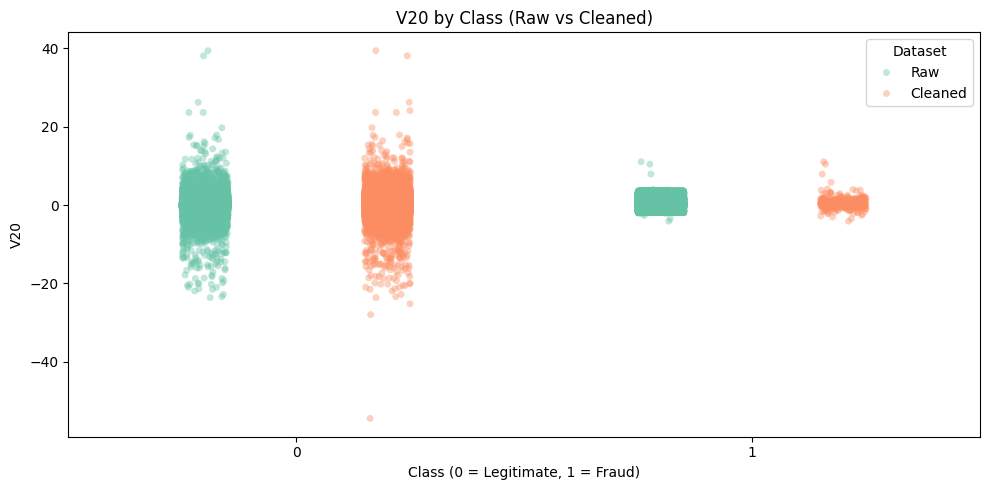

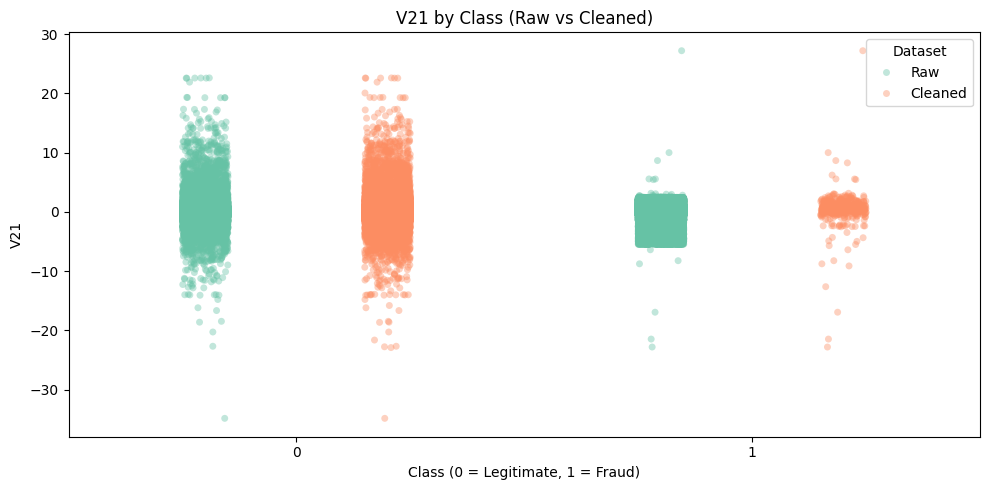

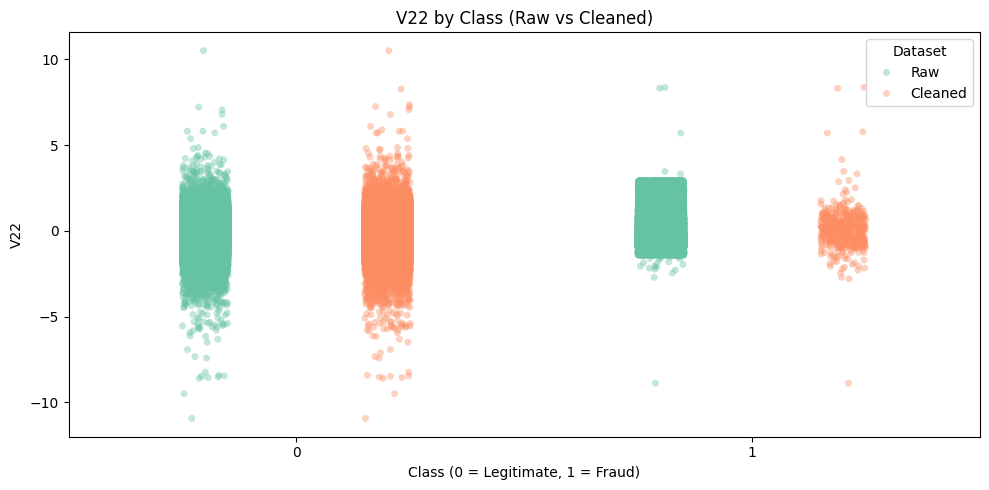

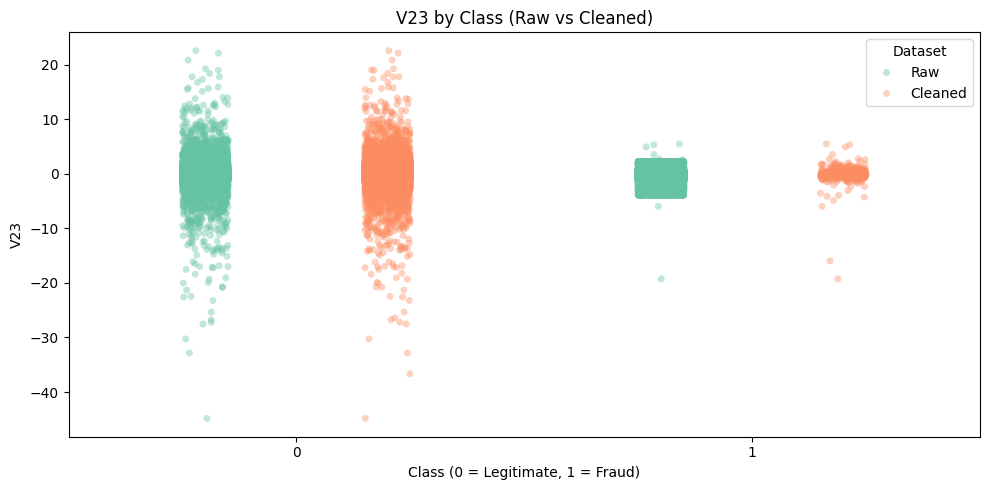

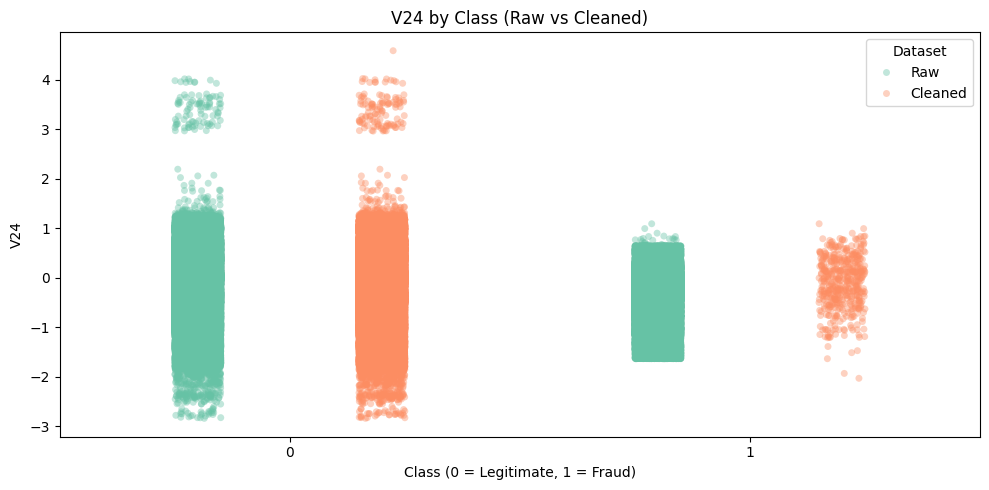

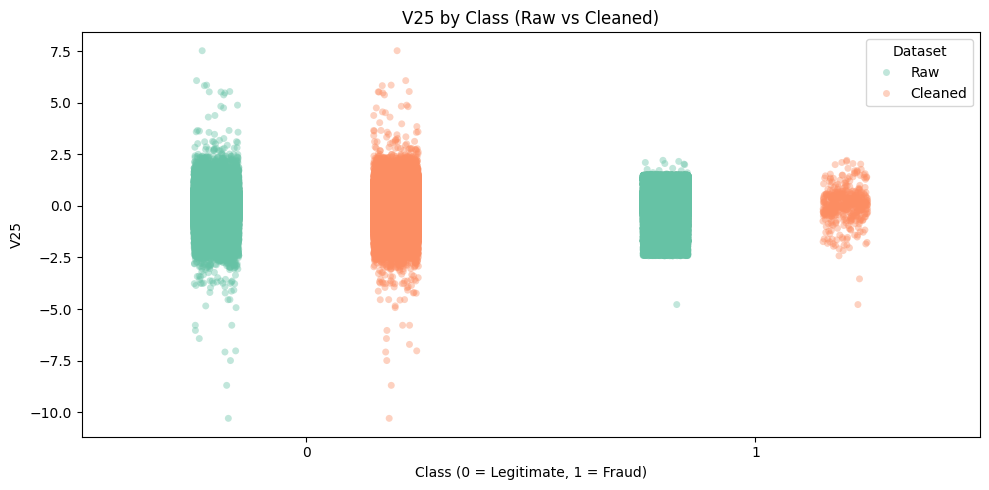

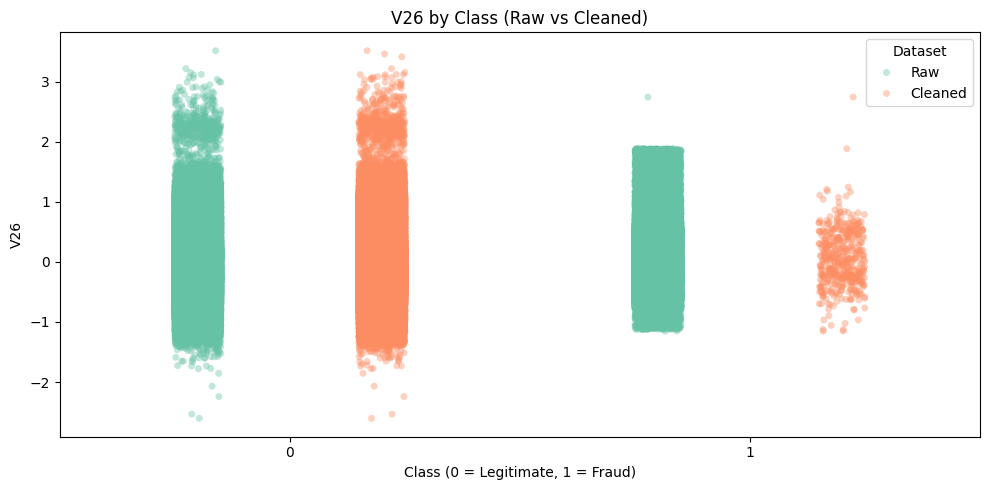

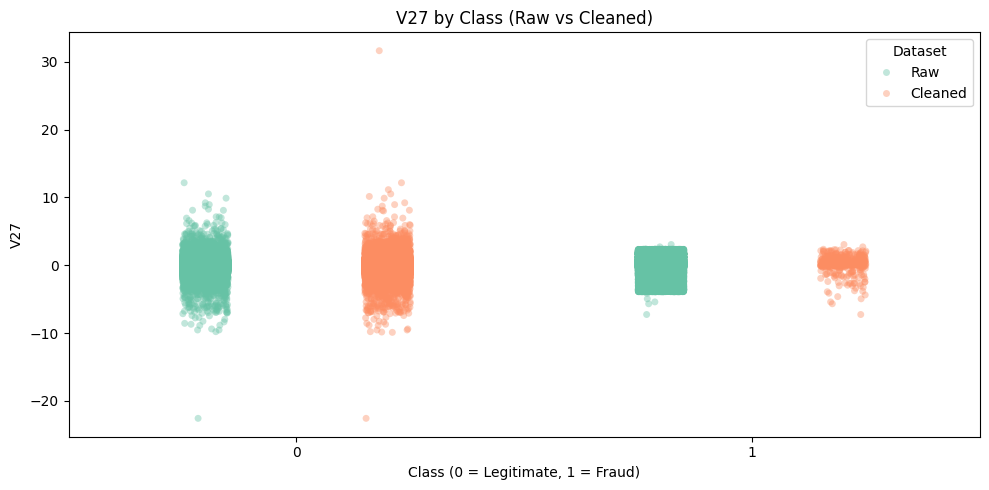

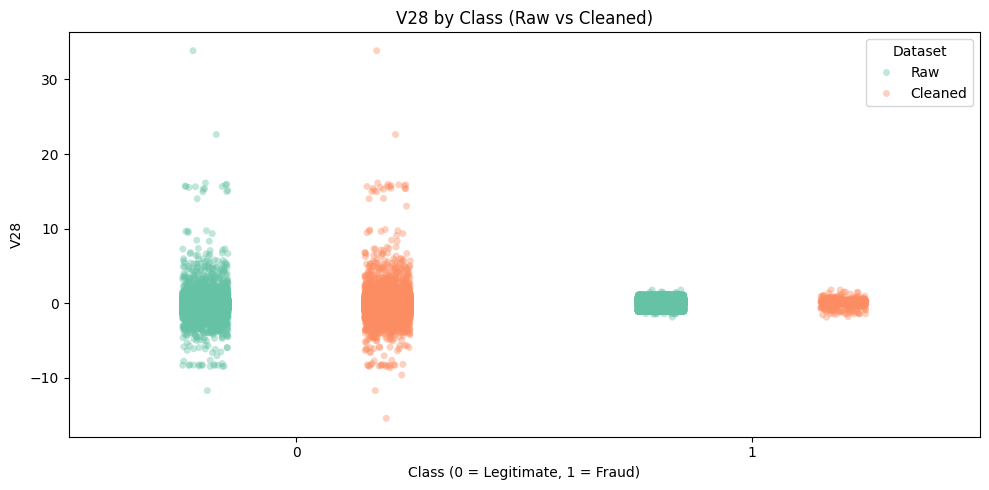

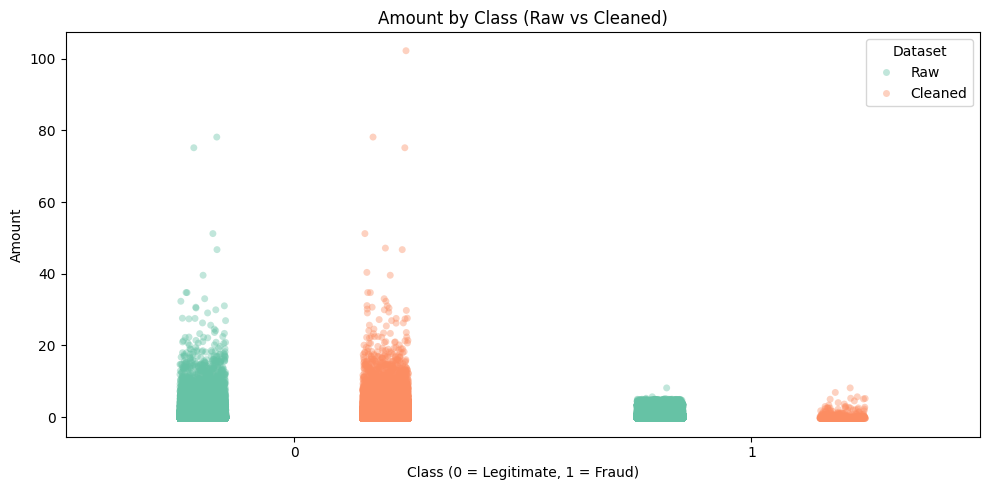

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df_raw = pd.read_csv("data/creditcard_borderlinesmote.csv")
df_clean = pd.read_csv("data/creditcard_preprocessed.csv")

# Add source label
df_raw["Dataset"] = "Raw"
df_clean["Dataset"] = "Cleaned"

# Rename for consistency
rename_map = {
    "scaled_amount": "Amount",
    "scaled_time": "Time"
}
df_raw = df_raw.rename(columns=rename_map)
df_clean = df_clean.rename(columns=rename_map)

# Find all common numeric features (excluding 'Class' and 'Dataset')
features = [col for col in df_clean.columns if col not in ["Class", "Dataset"]]

# Combine both for plotting
df_combined = pd.concat([
    df_raw[["Class", "Dataset"] + features],
    df_clean[["Class", "Dataset"] + features]
], ignore_index=True)

# Plot each feature separately
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.stripplot(data=df_combined, x="Class", y=feature, hue="Dataset",
                  jitter=True, dodge=True, alpha=0.4, palette="Set2")
    plt.title(f"{feature} by Class (Raw vs Cleaned)")
    plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
    plt.ylabel(feature)
    plt.legend(title="Dataset", loc="upper right")
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Завантаж дані
df_raw = pd.read_csv("data/creditcard_borderlinesmote.csv")
df_cleaned = pd.read_csv("data/creditcard_preprocessed.csv")

# Видаляємо цільову змінну
X_raw = df_raw.drop(columns="Class")
X_cleaned = df_cleaned.drop(columns="Class")

# Топ-10 фіч за зменшенням кількості викидів
top_features = ['V17', 'V8', 'V7', 'V27', 'V2', 'V20', 'V16', 'V1', 'V5', 'V28']

def count_outliers(df, features, contamination=0.05):
    counts = []
    for col in features:
        iso = IsolationForest(contamination=contamination, random_state=42)
        preds = iso.fit_predict(df[[col]])
        counts.append(sum(preds == -1))
    return counts

# Рахуємо кількість викидів
raw_outliers = count_outliers(X_raw, top_features)
cleaned_outliers = count_outliers(X_cleaned, top_features)

# Побудова графіка
x = range(len(top_features))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, raw_outliers, width=bar_width, label="Raw", alpha=0.7)
plt.bar([i + bar_width for i in x], cleaned_outliers, width=bar_width, label="Cleaned", alpha=0.7)
plt.xticks([i + bar_width / 2 for i in x], top_features, rotation=45)
plt.ylabel("Number of Outliers")
plt.title("Outlier Comparison: Raw vs Cleaned Dataset")
plt.legend()
plt.tight_layout()
plt.show()

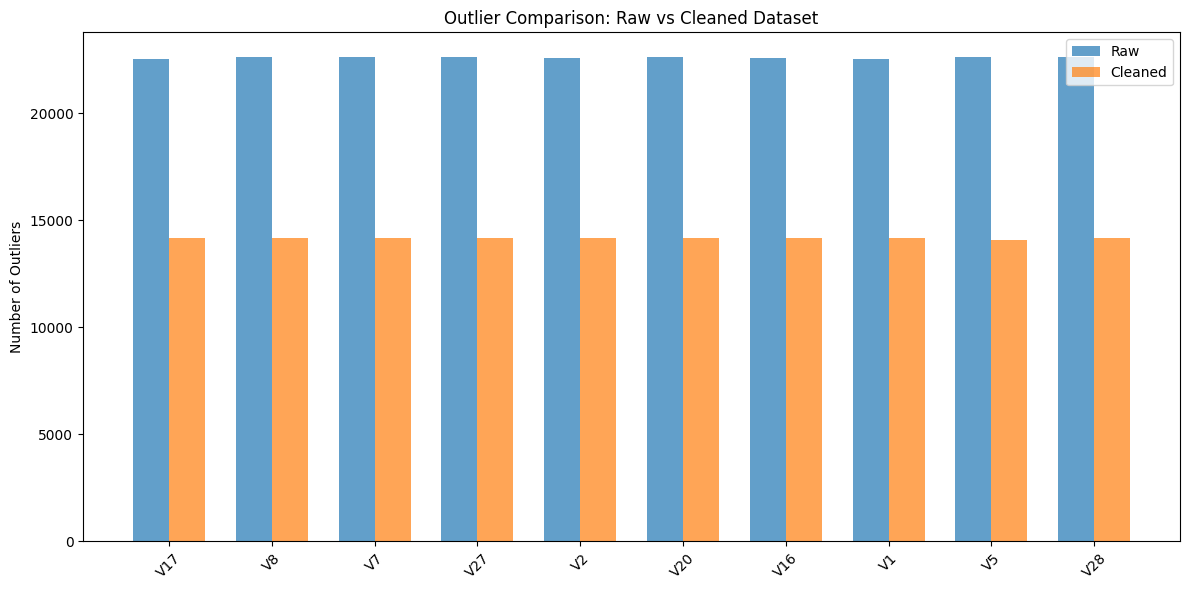

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load data
df_raw = pd.read_csv("data/creditcard_borderlinesmote.csv")
df_cleaned = pd.read_csv("data/creditcard_preprocessed.csv")

# Delete the target variable
X_raw = df_raw.drop(columns="Class")
X_cleaned = df_cleaned.drop(columns="Class")

# Top 10 features for reducing emissions
top_features = ['V17', 'V8', 'V7', 'V27', 'V2', 'V20', 'V16', 'V1', 'V5', 'V28']

def count_outliers(df, features, contamination=0.05):
    counts = []
    for col in features:
        iso = IsolationForest(contamination=contamination, random_state=42)
        preds = iso.fit_predict(df[[col]])
        counts.append(sum(preds == -1))
    return counts

# Top 10 features to reduce outliers
raw_outliers = count_outliers(X_raw, top_features)
cleaned_outliers = count_outliers(X_cleaned, top_features)

# Visualization
x = range(len(top_features))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x, raw_outliers, width=bar_width, label="Raw", alpha=0.7)
plt.bar([i + bar_width for i in x], cleaned_outliers, width=bar_width, label="Cleaned", alpha=0.7)
plt.xticks([i + bar_width / 2 for i in x], top_features, rotation=45)
plt.ylabel("Number of Outliers")
plt.title("Outlier Comparison: Raw vs Cleaned Dataset")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# 1. Loading the initial dataset
df = pd.read_csv("data/creditcard_preprocessed.csv")

# 2. Separating the target variable
X = df.drop("Class", axis=1)
y = df["Class"]

# 3. Initializing the IsolationForest model
iso = IsolationForest(contamination=0.001, random_state=42)
outliers = iso.fit_predict(X)

# 4. Filtering normal values (1 - normal, -1 - outliers)
mask = outliers == 1
X_clean = X[mask]
y_clean = y[mask]

# 5. Merge back into the final DataFrame
df_cleaned = X_clean.copy()
df_cleaned["Class"] = y_clean

# 6. Saving
df_cleaned.to_csv("data/creditcard_isoforest_cleaned_001.csv", index=False)
print("File saved as data/creditcard_isoforest_cleaned.csv")

File saved as data/creditcard_isoforest_cleaned.csv
